# STARBUCKS REVIEWS

Dataset con reseñas dejadas por clientes de Starbucks de Kaggle (https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset). Consta de 6 variables:
+ Nombre de la persona que escribe la reseña
+ Ubicación del establecimiento
+ Fecha en que se publica la reseña
+ Puntuación (de 1 a 5)
+ Opinión publicada en forma de texto
+ Imágenes (no se van a emplear en este análisis)

El objetivo es tratar de encontrar relaciones entre las palabras empleadas en los comentarios y la puntuación dada al local, viendo si hay determinadas palabras que se pueden asociar a comentarios positivos y, de igual manera, a comentarios negativos. 

## CARGA DE DATOS

In [131]:
import numpy as np
import pandas as pd

# Database de Kaggle: https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset
df = pd.read_csv('reviews_data.csv')
df = df.drop(columns=['Image_Links']) # Elimina la columna de las imágenes

## INFO VARIABLES DATASET

In [132]:
df.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      850 non-null    object 
 1   location  850 non-null    object 
 2   Date      850 non-null    object 
 3   Rating    705 non-null    float64
 4   Review    850 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.3+ KB


In [134]:
df.isnull().sum()

name          0
location      0
Date          0
Rating      145
Review        0
dtype: int64

Se aprecia que hay un total de 145 reseñas carentes de 'Rating'.\
Estas reseñas se eliminan del dataframe ya que no se pueden emplear en el análisis.

In [135]:
df_cleaned = df.dropna(subset=["Rating"])

df_cleaned.shape[0]

705

In [136]:
df_cleaned.isnull().sum()

name        0
location    0
Date        0
Rating      0
Review      0
dtype: int64

Efectivamente el nuevo dataframe ('df_cleaned') ya solo tiene 705 entradas, y ninguna de ellas tiene ningún campo vacío.

## VISUALIZACIÓN DE CALIFICACIONES

C:\Users\galez\AppData\Local\Temp\ipykernel_25864\3349979922.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Rating', palette='viridis')


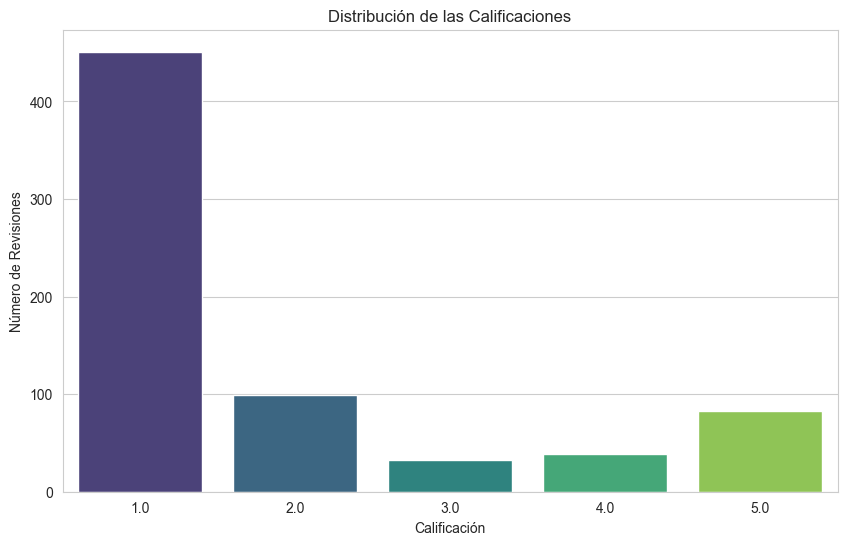

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Rating', palette='viridis')
plt.title('Distribución de las Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Número de Revisiones')
plt.show()

In [138]:
# Datos estadísticos de las variables numéricas (solo una en este caso)
df.describe()

,Rating
count,705.000000
mean,1.870922
std,1.397672
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


Se observa que las calificaciones son considerablemente bajas ya que:
* La calificación media es 1.87.
* La mediana es igual que la nota mínima, es decir que al menos la mitad de las calicaciones tienen la calificación mínima de 1. 
* El 75% de las reseñas tiene una calificación de 1 o 2.

## PREPROCESADO Y TOKENIZACIÓN

A continuación se va a tokenizar el texto de las reseñas, proceso mediante el cual se divide el texto en unidades más pequeñas llamadas tokens, y se eliminan caracteres no alfabéticos y las denominadas stopwords (conectores que no aportan significado como tal a la frase).

In [139]:
# Instalación de la librería en caso de ser necesario
# ! pip install nltk

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para el preprocesamiento del texto de los comentarios
def preprocess_text(text):
    text = text.lower() # Convertir el texto a minúsculas   
    text = re.sub(r'[^a-z\s]', '', text)   # Eliminar caracteres no alfabéticos
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar múltiples espacios en blanco
    text = ' '.join([word for word in text.split() if word not in stop_words]) # Elimina las stopwords
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\galez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
# Creamos una nueva variable con el texto preprocesado
df_cleaned['Processed_Review'] = df_cleaned['Review'].apply(preprocess_text)

# Creamos otra nueva variable con los tokens a partir del texto preprocesado
df_cleaned['tokens'] = df_cleaned['Processed_Review'].str.split()

df_cleaned[['Review', 'Processed_Review', 'tokens']].head()

C:\Users\galez\AppData\Local\Temp\ipykernel_25864\1295433704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Processed_Review'] = df_cleaned['Review'].apply(preprocess_text)
C:\Users\galez\AppData\Local\Temp\ipykernel_25864\1295433704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tokens'] = df_cleaned['Processed_Review'].str.split()


,Review,Processed_Review,tokens
0,Amber and LaDonna at the Starbucks on Southwes...,amber ladonna starbucks southwest parkway alwa...,"[amber, ladonna, starbucks, southwest, parkway..."
1,** at the Starbucks by the fire station on 436...,starbucks fire station altamonte springs fl ma...,"[starbucks, fire, station, altamonte, springs,..."
2,I just wanted to go out of my way to recognize...,wanted go way recognize starbucks employee bil...,"[wanted, go, way, recognize, starbucks, employ..."
3,Me and my friend were at Starbucks and my card...,friend starbucks card didnt work thankful work...,"[friend, starbucks, card, didnt, work, thankfu..."
4,I’m on this kick of drinking 5 cups of warm wa...,im kick drinking cups warm water work instacar...,"[im, kick, drinking, cups, warm, water, work, ..."


Se aprecia como se van tokenizando las frases en vectores de palabras.

## LEMATIZACIÓN

Ahora procedemos a la Lematización, que reduce las palabras a su lexema. Por ejemplo, las palabras "running", "runs" y "ran" se reducirían a su forma base "run".\
Se puede lematizar con la librería 'nltk', pero la librería 'spacy' obtiene mejores resultados, por lo que vamos a usar esta.

In [141]:
# Instalación de la librería en caso de ser necesario
# ! pip install spacy

import spacy
!python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text_tokens):
    text = ' '.join(text_tokens)
    doc = nlp(text)
    return [token.lemma_ for token in doc]

# Nueva columna con la lematización de los tokens
df_cleaned['lemmas'] = df_cleaned['tokens'].apply(lemmatize_text)

df_cleaned[['tokens', 'lemmas']].head()


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\galez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.3 MB/s eta 0:00:06
     ---- ----------------------------------- 1.6/12.8 MB 2.5 MB/s eta 0:00:05
     ------ --------------------------------- 2.1/12.8 MB 2.5 MB/s eta 0:00:05
     -------- ------------------------------- 2.6/12.8 MB 2.6 MB/s eta 0:00:04
     ---------- ----------------------------- 3.4/12.8 MB 2.7 MB/s eta 0:00:04
     ------------ --------------------------- 3.9/12.8 MB 2.6 MB/s eta 0:00:04
     -------------- ------------------------- 4.7/12.8 MB 2.7 MB/s eta 0:00:04
     ---------------- ----------------------- 5.2/12.8 MB 2.7 MB/s eta 0:00:03
     ------------------ --------------------- 6.0/12.8 MB 2.7 MB/s eta 0:00:03
     -------------------- ------------------- 6.6/12.8 MB 2.

C:\Users\galez\AppData\Local\Temp\ipykernel_25864\637690577.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['lemmas'] = df_cleaned['tokens'].apply(lemmatize_text)


,tokens,lemmas
0,"[amber, ladonna, starbucks, southwest, parkway...","[amber, ladonna, starbuck, southwest, parkway,..."
1,"[starbucks, fire, station, altamonte, springs,...","[starbuck, fire, station, altamonte, spring, f..."
2,"[wanted, go, way, recognize, starbucks, employ...","[wanted, go, way, recognize, starbuck, employe..."
3,"[friend, starbucks, card, didnt, work, thankfu...","[friend, starbuck, card, do, not, work, thankf..."
4,"[im, kick, drinking, cups, warm, water, work, ...","[I, m, kick, drinking, cup, warm, water, work,..."


C:\Users\galez\AppData\Local\Temp\ipykernel_25864\3718442530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['review_length'] = df_cleaned['tokens'].apply(len)
C:\Users\galez\AppData\Local\Temp\ipykernel_25864\3718442530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Rating', y='review_length', palette='viridis')


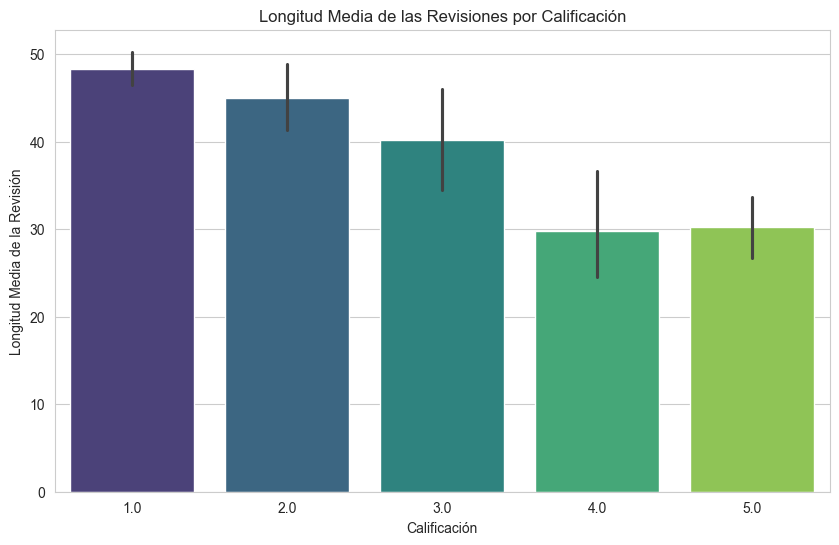

In [142]:
# Nueva columna con el número de tokens por entrada
df_cleaned['review_length'] = df_cleaned['tokens'].apply(len)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_cleaned, x='Rating', y='review_length', palette='viridis')
plt.title('Longitud Media de las Revisiones por Calificación')
plt.xlabel('Calificación')
plt.ylabel('Longitud Media de la Revisión')
plt.show()

El gráfico muestra la longitud media de las revisiones según las calificaciones. Podemos observar que las revisiones con calificaciones más bajas (1 y 2 estrellas) tienden a ser más largas en promedio que las revisiones con calificaciones más altas (4 y 5 estrellas). \
Esto parece indicar que los usuarios tienden a dar explicaciones más extensas cuando tienen críticas o problemas con el producto o servicio.

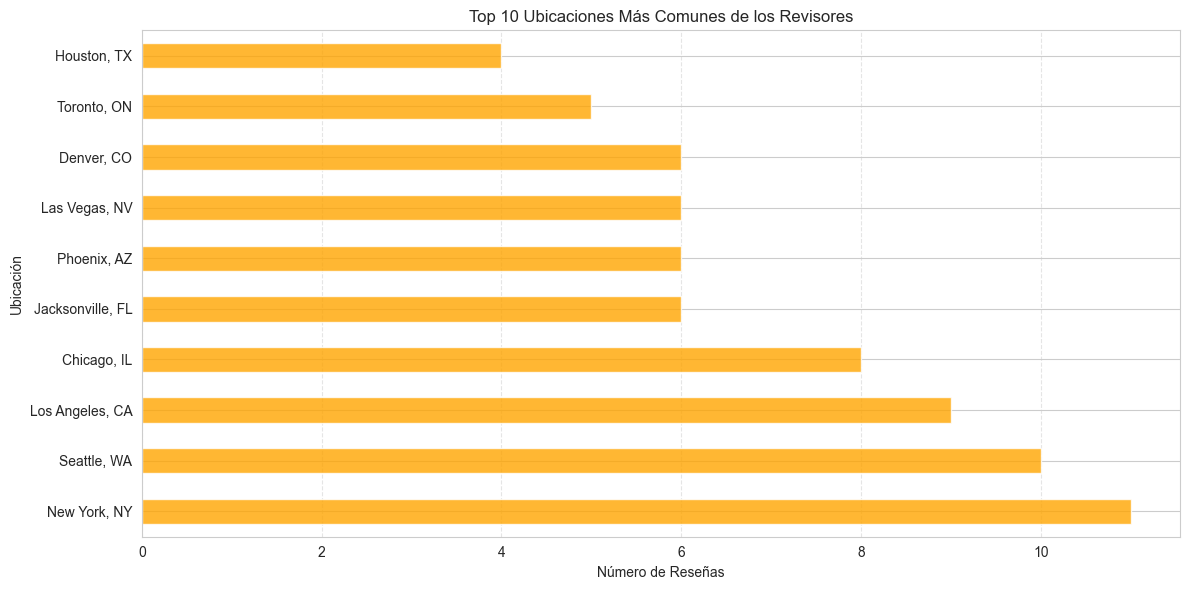

In [143]:
top_locations = df_cleaned['location'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_locations.plot(kind='barh', color='orange', alpha=0.8)
plt.title('Top 10 Ubicaciones Más Comunes de los Revisores')
plt.xlabel('Número de Reseñas')
plt.ylabel('Ubicación')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Vemos que las reseñas están distribuidas por varias ciudades y no hay ninguna que destaque excesivamente sobre el resto.

## CLASIFICACIÓN DE PALABRAS

A continuación creamos una nueva variable 'Sentiment' que será:
* Positive: si el rating es 4 o 5.
* Neutral: si el rating es 3.
* Negative: si el rating es 1 o 2.

De esta forma cada token queda asociado a un "sentimiento", lo cual nos permitirá saber cuales son las palabras más frecuentes dentro de cada "sentimiento". 

In [144]:
def categorize_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

df_cleaned['Sentiment'] = df_cleaned['Rating'].apply(categorize_sentiment)

sentiment_distribution = df_cleaned['Sentiment'].value_counts()
sentiment_distribution

C:\Users\galez\AppData\Local\Temp\ipykernel_25864\2469586730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sentiment'] = df_cleaned['Rating'].apply(categorize_sentiment)


Sentiment
negative    550
positive    122
neutral      33
Name: count, dtype: int64

In [145]:
from collections import Counter

def get_most_common_words(tokens_list, top_n=10):

    all_words = [word for tokens in tokens_list for word in tokens]
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)


top_words_all = get_most_common_words(df_cleaned['lemmas'], top_n=10)
top_words_all

[('starbuck', 879),
 ('coffee', 519),
 ('go', 471),
 ('get', 432),
 ('not', 421),
 ('customer', 367),
 ('order', 357),
 ('drink', 337),
 ('time', 288),
 ('store', 271)]

C:\Users\galez\AppData\Local\Temp\ipykernel_25864\82397376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(frequencies), palette="viridis")


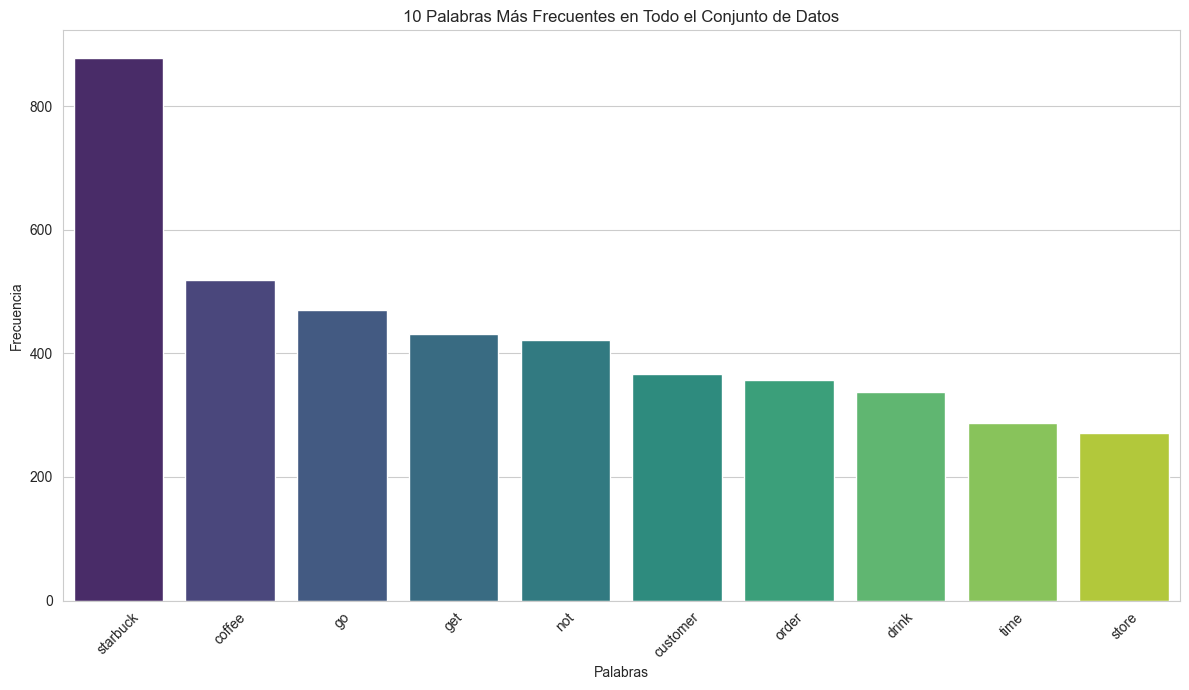

In [146]:
words, frequencies = zip(*top_words_all)

plt.figure(figsize=(12, 7))
sns.barplot(x=list(words), y=list(frequencies), palette="viridis")
plt.title('10 Palabras Más Frecuentes en Todo el Conjunto de Datos')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Estas son las palabras que más aparecen en los comentarios en general

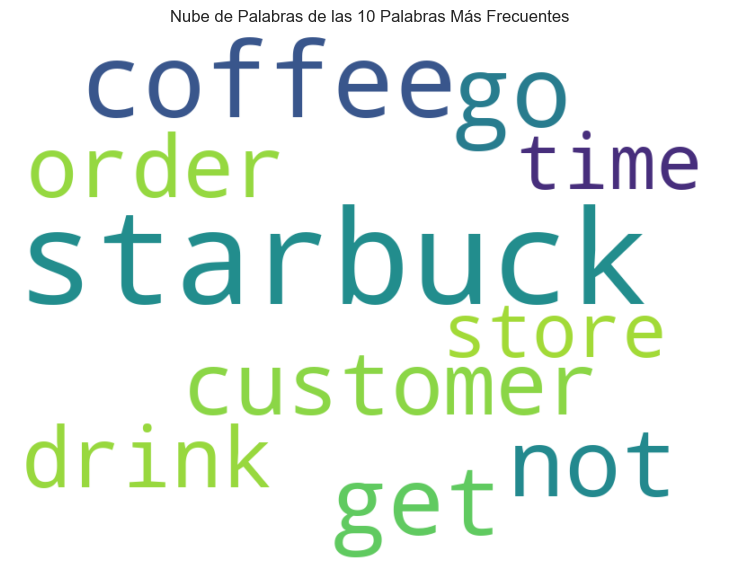

In [147]:
# Instalación de la librería en caso de ser necesario
# ! pip install wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(dict(top_words_all))

# Visualizar la nube de palabras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las 10 Palabras Más Frecuentes')
plt.show()

#### Palabras Positivas

C:\Users\galez\AppData\Local\Temp\ipykernel_25864\1473774407.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_positive), y=list(frequencies_positive), palette="viridis")


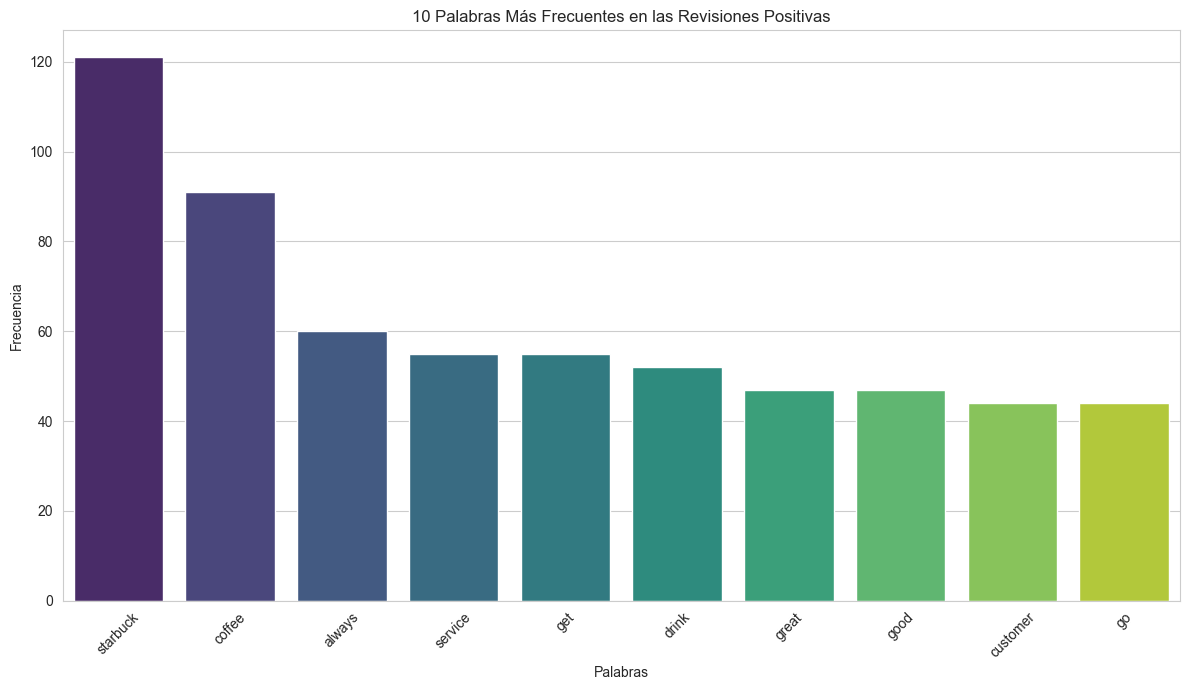

In [148]:
top_words_positive = get_most_common_words(df_cleaned[df_cleaned['Sentiment'] == 'positive']['lemmas'], top_n=10)

words_positive, frequencies_positive = zip(*top_words_positive)

plt.figure(figsize=(12, 7))
sns.barplot(x=list(words_positive), y=list(frequencies_positive), palette="viridis")
plt.title('10 Palabras Más Frecuentes en las Revisiones Positivas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

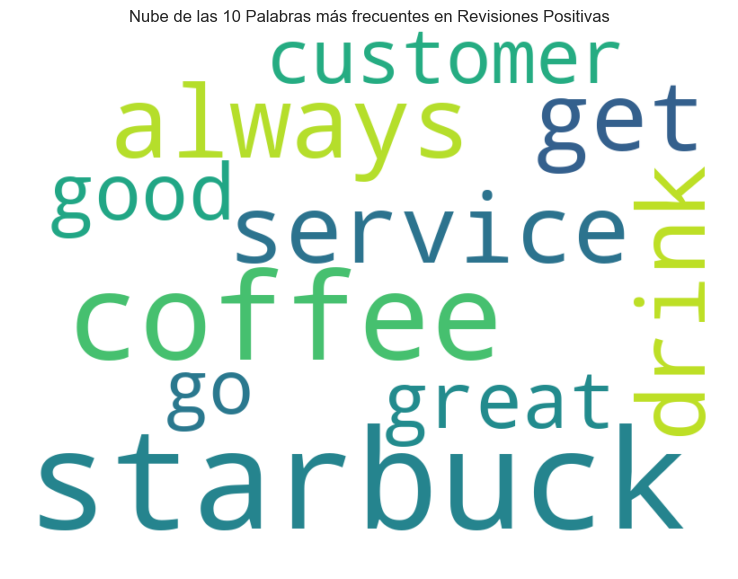

In [149]:
wordcloud_positive = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(dict(top_words_positive))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de las 10 Palabras más frecuentes en Revisiones Positivas')
plt.show()

#### Palabras Neutras

C:\Users\galez\AppData\Local\Temp\ipykernel_25864\1347557398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_neutral), y=list(frequencies_neutral), palette="viridis")


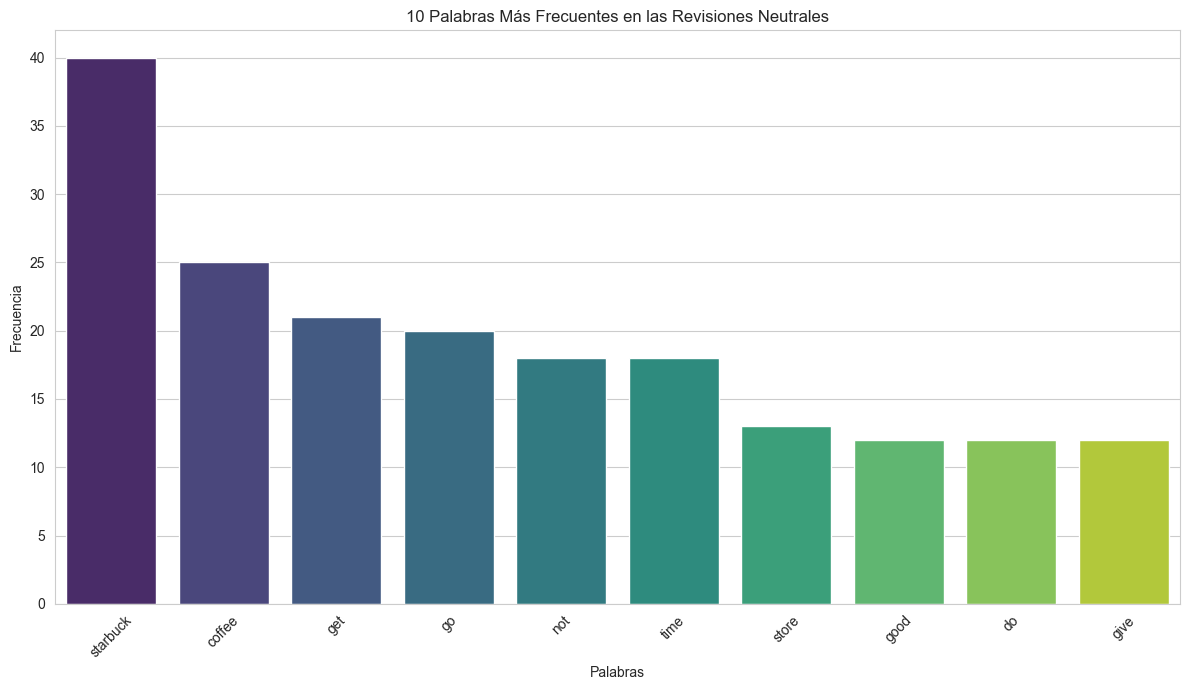

In [150]:
top_words_neutral = get_most_common_words(df_cleaned[df_cleaned['Sentiment'] == 'neutral']['lemmas'], top_n=10)

words_neutral, frequencies_neutral = zip(*top_words_neutral)

plt.figure(figsize=(12, 7))
sns.barplot(x=list(words_neutral), y=list(frequencies_neutral), palette="viridis")
plt.title('10 Palabras Más Frecuentes en las Revisiones Neutrales')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

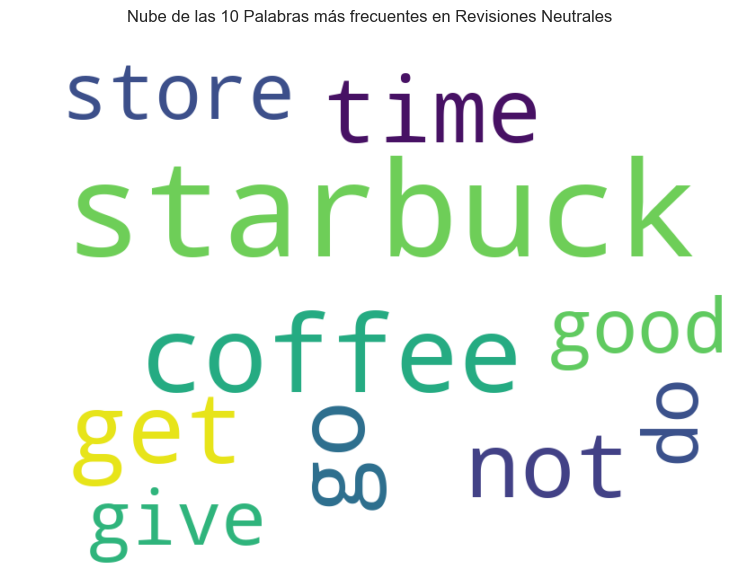

In [151]:
wordcloud_neutral = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(dict(top_words_neutral))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de las 10 Palabras más frecuentes en Revisiones Neutrales')
plt.show()

#### Palabras Negativas

C:\Users\galez\AppData\Local\Temp\ipykernel_25864\2664856702.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_negative), y=list(frequencies_negative), palette="viridis")


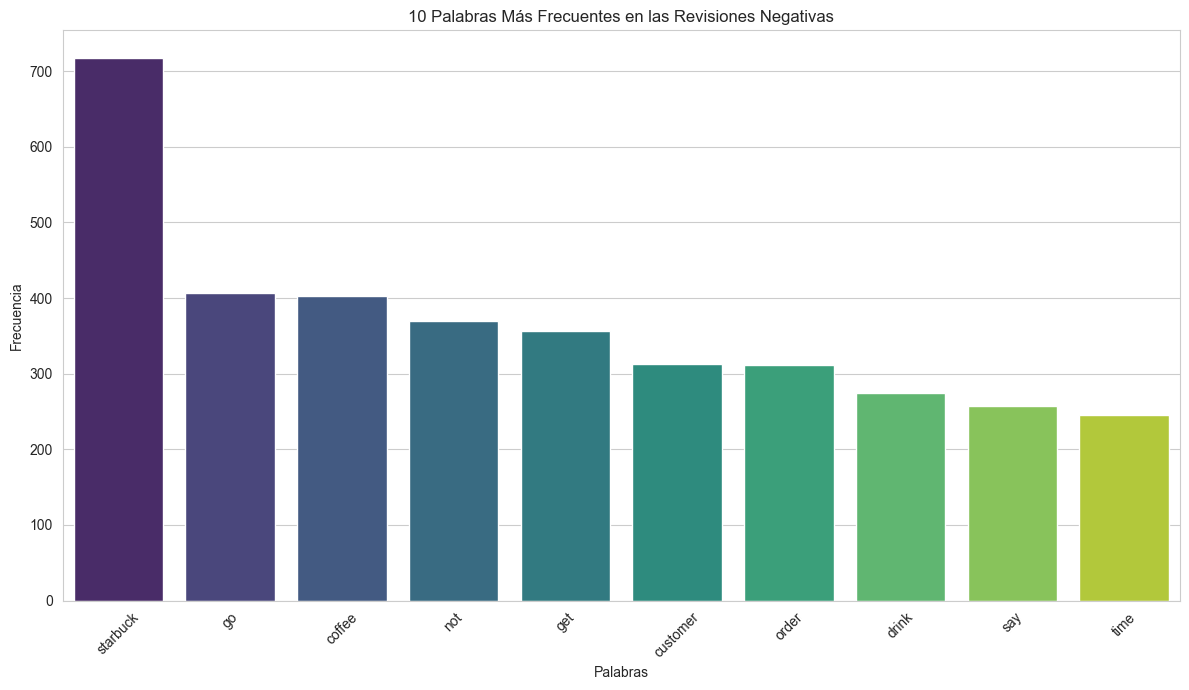

In [152]:
top_words_negative = get_most_common_words(df_cleaned[df_cleaned['Sentiment'] == 'negative']['lemmas'], top_n=10)

words_negative, frequencies_negative = zip(*top_words_negative)

plt.figure(figsize=(12, 7))
sns.barplot(x=list(words_negative), y=list(frequencies_negative), palette="viridis")
plt.title('10 Palabras Más Frecuentes en las Revisiones Negativas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

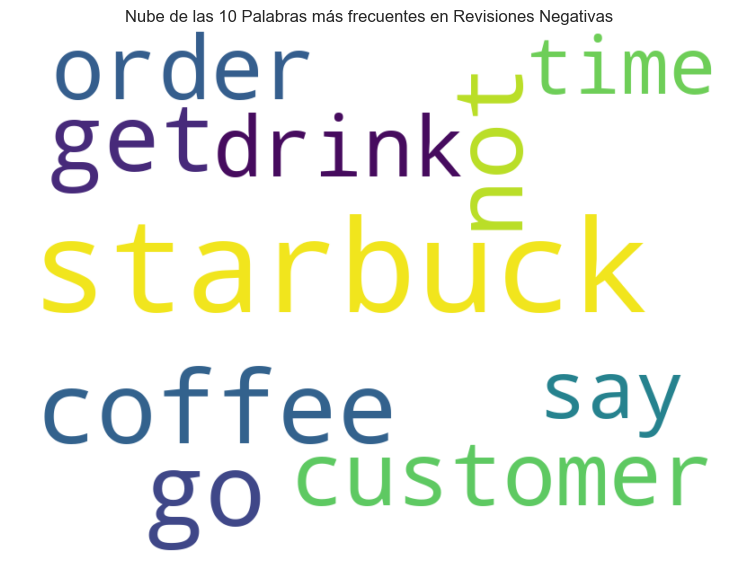

In [153]:
wordcloud_negative = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(dict(top_words_negative))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de las 10 Palabras más frecuentes en Revisiones Negativas')
plt.show()

Por último vamos a comparar las palabras de las matrices 'wordcloud_positive' y 'wordcloud_negative' para quedarnos en cada uno solo con las palabras que no están repetidas en ambos y que por tanto se supone que serán las que más relevancia tengan.

In [154]:
def extraer_palabras_unicas(lista_positiva, lista_negativa):
    # Extraemos solo las palabras de cada lista
    palabras_positivas = [palabra for palabra, _ in lista_positiva]
    palabras_negativas = [palabra for palabra, _ in lista_negativa]
    
    # Usamos conjuntos para encontrar palabras únicas en cada lista
    unicas_positivas = [(palabra, freq) for palabra, freq in lista_positiva 
                       if palabra not in palabras_negativas]
    unicas_negativas = [(palabra, freq) for palabra, freq in lista_negativa 
                       if palabra not in palabras_positivas]
    
    return unicas_positivas, unicas_negativas


unicas_positivas, unicas_negativas = extraer_palabras_unicas(top_words_positive, top_words_negative)

print("Palabras únicas en la lista positiva:")
for palabra, freq in unicas_positivas:
    print(f"'{palabra}' (frecuencia: {freq})")

print("\nPalabras únicas en la lista negativa:")
for palabra, freq in unicas_negativas:
    print(f"'{palabra}' (frecuencia: {freq})")

Palabras únicas en la lista positiva:
'always' (frecuencia: 60)
'service' (frecuencia: 55)
'great' (frecuencia: 47)
'good' (frecuencia: 47)

Palabras únicas en la lista negativa:
'not' (frecuencia: 370)
'order' (frecuencia: 312)
'say' (frecuencia: 257)
'time' (frecuencia: 245)


Observamos así que quedan como Palabras Positivas que más ser repiten:
* Always
* Service
* Great
* Good

Y como Palabras Negativas que más se repiten:
* Not
* Order
* Say
* Time


## SUBIDA DE DATOS A AZURE

Por último subimos los datos a Azure. Ya tenemos un servidor de SQL creado.\
Vamos a crear dos tablas de datos:
* Reviews: que contenga el dataframe inicial.
* Reviews_Processed: que contenga el dataframe al que hemos llegado finalmente con las columnas extras de las palabras tokenizadas.

Primero configuramos la conexión con el servidor de Azure SQL

In [155]:
import pyodbc

# Configurar la conexión a Azure SQL Server
conn_str = (
    "DRIVER={ODBC Driver 18 for SQL Server};"
    "SERVER=starbucks.database.windows.net;"
    "DATABASE=Starbucks;"
    "UID=CloudSAde078437;"
    "PWD=abc123**;"
    "Encrypt=yes;"
    "TrustServerCertificate=yes;"
    "Connection Timeout=30;"
)

# Intentar la conexión
try:
    conn = pyodbc.connect(conn_str)
    print("Conexión exitosa a Azure SQL Server")
except Exception as e:
    print("Error en la conexión:", e)

Conexión exitosa a Azure SQL Server


### CREACIÓN DE LA TABLA Reviews

In [156]:
cursor = conn.cursor()

# Crear la tabla si no existe
create_table_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Reviews' AND xtype='U')
CREATE TABLE Reviews (
    id INT IDENTITY(1,1) PRIMARY KEY,
    name NVARCHAR(255),
    location NVARCHAR(255),
    Date NVARCHAR(255),
    Rating FLOAT,
    Review NVARCHAR(MAX),
    Image_Links NVARCHAR(MAX)
)
"""
cursor.execute(create_table_query)
conn.commit()
print("Tabla 'Reviews' creada correctamente.")


Tabla 'Reviews' creada correctamente.


In [157]:
# Insertar datos en la tabla
df['Rating'] = df['Rating'].fillna(0)

for index, row in df.iterrows():
    cursor.execute("""
        INSERT INTO Reviews (name, location, Date, Rating, Review)
        VALUES (?, ?, ?, ?, ?)
    """, row['name'], row['location'], row['Date'], row['Rating'], row['Review'])

conn.commit()
print("Datos insertados correctamente en Azure SQL Server.")

Datos insertados correctamente en Azure SQL Server.


### CREACIÓN DE LA TABLA Reviews_Processed

In [158]:
cursor = conn.cursor()

# Crear la tabla en Azure si no existe
create_table_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Reviews_Processed' AND xtype='U')
CREATE TABLE Reviews_Processed (
    id INT IDENTITY(1,1) PRIMARY KEY,
    name NVARCHAR(255),
    location NVARCHAR(255),
    Date NVARCHAR(255),
    Rating FLOAT,
    Review NVARCHAR(MAX),
    Processed_Review NVARCHAR(MAX),
    tokens NVARCHAR(MAX),
    lemmas NVARCHAR(MAX),
    review_length INT,
    Sentiment NVARCHAR(50)
)
"""
cursor.execute(create_table_query)
conn.commit()
print("Tabla 'Reviews_Processed' verificada/creada correctamente.")


Tabla 'Reviews_Processed' verificada/creada correctamente.


In [159]:
for index, row in df_cleaned.iterrows():
    cursor.execute("""
        INSERT INTO Reviews_Processed (name, location, Date, Rating, Review, Processed_Review, tokens, lemmas, review_length, Sentiment)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, row['name'], row['location'], row['Date'], float(row['Rating']), row['Review'], 
         row['Processed_Review'], str(row['tokens']), str(row['lemmas']), int(row['review_length']), row['Sentiment'])

conn.commit()
print("Datos insertados correctamente en Azure SQL Server.")

Datos insertados correctamente en Azure SQL Server.
